<a href="https://colab.research.google.com/github/Luccadr/projects/blob/main/NFL_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NFL scores and betting data

## Importing data and libraries



In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statistics  as sts
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import Image

In [2]:
### data 
teams = pd.read_csv('nfl_teams.csv',engine='python')
stadiums = pd.read_csv('nfl_stadiums.csv', engine='python')
scores = pd.read_csv('spreadspoke_scores.csv',engine='python')

In [3]:
teams

,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
1,Phoenix Cardinals,Cardinals,ARI,CRD,NFC,NaN,NFC,NFC East
2,St. Louis Cardinals,Cardinals,ARI,ARI,NFC,NaN,NFC,NFC East
3,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
4,Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central
5,Buffalo Bills,Bills,BUF,BUF,AFC,AFC East,AFC,AFC East
6,Carolina Panthers,Panthers,CAR,CAR,NFC,NFC South,NFC,NFC West
7,Chicago Bears,Bears,CHI,CHI,NFC,NFC North,NFC,NFC Central
8,Cincinnati Bengals,Bengals,CIN,CIN,AFC,AFC North,AFC,AFC Central
9,Cleveland Browns,Browns,CLE,CLE,AFC,AFC North,AFC,AFC Central


In [4]:
scores

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13214,1/9/2021,2021,18,False,Tampa Bay Buccaneers,NaN,NaN,Carolina Panthers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13215,1/9/2021,2021,18,False,Arizona Cardinals,NaN,NaN,Seattle Seahawks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13216,1/9/2021,2021,18,False,Denver Broncos,NaN,NaN,Kansas City Chiefs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13217,1/9/2021,2021,18,False,Las Vegas Raiders,NaN,NaN,Los Angeles Chargers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
stadiums

,stadium_name,stadium_location,stadium_open,stadium_close,stadium_type,stadium_address,stadium_weather_station_code,stadium_weather_type,stadium_capacity,stadium_surface,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION
0,Alamo Dome,"San Antonio, TX",NaN,NaN,indoor,"100 Montana St, San Antonio, TX 78203",78203,dome,72000,FieldTurf,NaN,NaN,NaN,NaN,NaN
1,Allegiant Stadium,"Paradise, NV",2020.0,NaN,indoor,NaN,NaN,dome,65000,Grass,NaN,NaN,NaN,NaN,NaN
2,Alltel Stadium,"Jacksonville, FL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alumni Stadium,"Chestnut Hill, MA",NaN,NaN,outdoor,"Perimeter Rd, Chestnut Hill, MA 02467",2467,cold,NaN,Grass,NaN,NaN,NaN,NaN,NaN
4,Anaheim Stadium,"Anaheim, CA",1980.0,1994.0,outdoor,"2000 E Gene Autry Way, Anaheim, CA 92806",92806,warm,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,War Memorial Stadium,"Buffalo, NY",1960.0,1972.0,outdoor,"285 Dodge Street, Buffalo, NY 14208",14208,cold,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,Wembley Stadium,"London, UK",2007.0,NaN,outdoor,"Wembley, London HA9 0WS, United Kingdom","Heathrow, UK",moderate,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,Wrigley Field,"Chicago, IL",1920.0,1970.0,outdoor,"1060 West Addison Street, Chicago, IL 60613",60613,cold,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,Yale Bowl,"New Haven, CT",NaN,NaN,outdoor,"276 Derby Ave, West Haven, CT 06516",6516,cold,NaN,Grass,NaN,NaN,NaN,NaN,NaN


## Checking the datas

### Scores

In [6]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13219 entries, 0 to 13218
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        13219 non-null  object 
 1   schedule_season      13219 non-null  int64  
 2   schedule_week        13219 non-null  object 
 3   schedule_playoff     13219 non-null  bool   
 4   team_home            13219 non-null  object 
 5   score_home           12947 non-null  float64
 6   score_away           12947 non-null  float64
 7   team_away            13219 non-null  object 
 8   team_favorite_id     10468 non-null  object 
 9   spread_favorite      10468 non-null  float64
 10  over_under_line      10458 non-null  object 
 11  stadium              12947 non-null  object 
 12  stadium_neutral      12947 non-null  object 
 13  weather_temperature  12031 non-null  float64
 14  weather_wind_mph     12014 non-null  float64
 15  weather_humidity     8389 non-null  

In [7]:
scores.isnull().sum()

schedule_date              0
schedule_season            0
schedule_week              0
schedule_playoff           0
team_home                  0
score_home               272
score_away               272
team_away                  0
team_favorite_id        2751
spread_favorite         2751
over_under_line         2761
stadium                  272
stadium_neutral          272
weather_temperature     1188
weather_wind_mph        1205
weather_humidity        4830
weather_detail         10503
dtype: int64

In [8]:
scores[scores["score_home"].isnull()]

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
12947,9/9/2021,2021,1,False,Tampa Bay Buccaneers,NaN,NaN,Dallas Cowboys,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12948,9/12/2021,2021,1,False,Atlanta Falcons,NaN,NaN,Philadelphia Eagles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12949,9/12/2021,2021,1,False,Buffalo Bills,NaN,NaN,Pittsburgh Steelers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12950,9/12/2021,2021,1,False,Carolina Panthers,NaN,NaN,New York Jets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12951,9/12/2021,2021,1,False,Cincinnati Bengals,NaN,NaN,Minnesota Vikings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13214,1/9/2021,2021,18,False,Tampa Bay Buccaneers,NaN,NaN,Carolina Panthers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13215,1/9/2021,2021,18,False,Arizona Cardinals,NaN,NaN,Seattle Seahawks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13216,1/9/2021,2021,18,False,Denver Broncos,NaN,NaN,Kansas City Chiefs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13217,1/9/2021,2021,18,False,Las Vegas Raiders,NaN,NaN,Los Angeles Chargers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
scores[scores.schedule_season < 2021]

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12942,1/17/2021,2020,Division,True,Kansas City Chiefs,22.0,17.0,Cleveland Browns,KC,-8.0,56,Arrowhead Stadium,False,NaN,NaN,NaN,NaN
12943,1/17/2021,2020,Division,True,New Orleans Saints,20.0,30.0,Tampa Bay Buccaneers,NO,-2.5,53,Mercedes-Benz Superdome,False,NaN,NaN,NaN,NaN
12944,1/24/2021,2020,Conference,True,Green Bay Packers,26.0,31.0,Tampa Bay Buccaneers,GB,-3.0,53,Lambeau Field,False,NaN,NaN,NaN,NaN
12945,1/24/2021,2020,Conference,True,Kansas City Chiefs,38.0,24.0,Buffalo Bills,KC,-3.0,55,Arrowhead Stadium,False,NaN,NaN,NaN,NaN


In [10]:
# Selecting information before than 2021
scores_old = scores[scores.schedule_season < 2021]

In [11]:
scores_old.isnull().sum()

schedule_date              0
schedule_season            0
schedule_week              0
schedule_playoff           0
team_home                  0
score_home                 0
score_away                 0
team_away                  0
team_favorite_id        2479
spread_favorite         2479
over_under_line         2489
stadium                    0
stadium_neutral            0
weather_temperature      916
weather_wind_mph         933
weather_humidity        4558
weather_detail         10231
dtype: int64

In [12]:
scores_old.team_favorite_id.unique()

array([nan, 'GB', 'IND', 'MIN', 'DAL', 'MIA', 'PIT', 'LVR', 'TB', 'ATL',
       'LAR', 'NE', 'CHI', 'DEN', 'KC', 'NO', 'NYJ', 'PHI', 'SEA', 'TEN',
       'PICK', 'CIN', 'ARI', 'LAC', 'CLE', 'WAS', 'BUF', 'DET', 'NYG',
       'SF', 'BAL', 'JAX', 'CAR', 'HOU'], dtype=object)

In [13]:
scores_old.tail(20)

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
12927,1/3/2021,2020,17,False,Kansas City Chiefs,21.0,38.0,Los Angeles Chargers,LAC,-6.5,43,Arrowhead Stadium,False,NaN,NaN,NaN,NaN
12928,1/3/2021,2020,17,False,Los Angeles Rams,18.0,7.0,Arizona Cardinals,LAR,-1.0,42,SoFi Stadium,False,NaN,NaN,NaN,NaN
12929,1/3/2021,2020,17,False,New England Patriots,28.0,14.0,New York Jets,NE,-3.0,41,Gillette Stadium,False,NaN,NaN,NaN,NaN
12930,1/3/2021,2020,17,False,New York Giants,23.0,19.0,Dallas Cowboys,DAL,-1.5,43.5,MetLife Stadium,False,NaN,NaN,NaN,NaN
12931,1/3/2021,2020,17,False,Philadelphia Eagles,14.0,20.0,Washington Football Team,WAS,-6.5,43.5,Lincoln Financial Field,False,NaN,NaN,NaN,NaN
12932,1/3/2021,2020,17,False,San Francisco 49ers,23.0,26.0,Seattle Seahawks,SEA,-7.0,45,Levi's Stadium,False,NaN,NaN,NaN,NaN
12933,1/3/2021,2020,17,False,Tampa Bay Buccaneers,44.0,27.0,Atlanta Falcons,TB,-7.0,51,Raymond James Stadium,False,NaN,NaN,NaN,NaN
12934,1/9/2021,2020,Wildcard,True,Buffalo Bills,27.0,24.0,Indianapolis Colts,BUF,-7.0,50.5,New Era Field,False,NaN,NaN,NaN,NaN
12935,1/9/2021,2020,Wildcard,True,Seattle Seahawks,20.0,30.0,Los Angeles Rams,SEA,-3.0,42.5,CenturyLink Field,False,NaN,NaN,NaN,NaN
12936,1/9/2021,2020,Wildcard,True,Washington Football Team,23.0,31.0,Tampa Bay Buccaneers,TB,-10.0,45,FedEx Field,False,NaN,NaN,NaN,NaN


### Stadiums

In [14]:
stadiums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   stadium_name                  106 non-null    object 
 1   stadium_location              106 non-null    object 
 2   stadium_open                  82 non-null     float64
 3   stadium_close                 41 non-null     float64
 4   stadium_type                  99 non-null     object 
 5   stadium_address               94 non-null     object 
 6   stadium_weather_station_code  93 non-null     object 
 7   stadium_weather_type          99 non-null     object 
 8   stadium_capacity              45 non-null     object 
 9   stadium_surface               59 non-null     object 
 10  STATION                       55 non-null     object 
 11  NAME                          55 non-null     object 
 12  LATITUDE                      55 non-null     float64
 13  LONGI

In [15]:
stadiums.isnull().sum()

stadium_name                     0
stadium_location                 0
stadium_open                    24
stadium_close                   65
stadium_type                     7
stadium_address                 12
stadium_weather_station_code    13
stadium_weather_type             7
stadium_capacity                61
stadium_surface                 47
STATION                         51
NAME                            51
LATITUDE                        51
LONGITUDE                       51
ELEVATION                       51
dtype: int64

In [16]:
stadiums[stadiums.stadium_type.isnull()]

,stadium_name,stadium_location,stadium_open,stadium_close,stadium_type,stadium_address,stadium_weather_station_code,stadium_weather_type,stadium_capacity,stadium_surface,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION
2,Alltel Stadium,"Jacksonville, FL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Dolphin Stadium,"Miami, FL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,Jack Murphy Stadium,"San Diego, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,Joe Robbie Stadium,"Miami, FL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,Pro Player Stadium,"Miami, FL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Stanford Stadium,"Palo Alto, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,Tampa Stadium,"Tampa, FL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
stadiums.stadium_type.unique()

array(['indoor', nan, 'outdoor', 'retractable'], dtype=object)

In [18]:
#Using outdoor as information to fill NaNs
stadiums["stadium_type"].fillna("outdoor", inplace = True)

In [19]:
stadiums[stadiums.stadium_type.isnull()]

,stadium_name,stadium_location,stadium_open,stadium_close,stadium_type,stadium_address,stadium_weather_station_code,stadium_weather_type,stadium_capacity,stadium_surface,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION


In [20]:
stadiums.tail(6)

,stadium_name,stadium_location,stadium_open,stadium_close,stadium_type,stadium_address,stadium_weather_station_code,stadium_weather_type,stadium_capacity,stadium_surface,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION
100,Veterans Stadium,"Philadelphia, PA",1971.0,2002.0,outdoor,"3501 South Broad Street, Philadelphia, Pennsyl...",19148,cold,NaN,NaN,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",39.87327,-75.22678,3.0
101,War Memorial Stadium,"Buffalo, NY",1960.0,1972.0,outdoor,"285 Dodge Street, Buffalo, NY 14208",14208,cold,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,Wembley Stadium,"London, UK",2007.0,NaN,outdoor,"Wembley, London HA9 0WS, United Kingdom","Heathrow, UK",moderate,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,Wrigley Field,"Chicago, IL",1920.0,1970.0,outdoor,"1060 West Addison Street, Chicago, IL 60613",60613,cold,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,Yale Bowl,"New Haven, CT",NaN,NaN,outdoor,"276 Derby Ave, West Haven, CT 06516",6516,cold,NaN,Grass,NaN,NaN,NaN,NaN,NaN
105,Yankee Stadium,"Bronx, NY",NaN,NaN,outdoor,NaN,NaN,cold,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Analysis 

### Stadium

In [21]:
stadiums[stadiums.stadium_close > 1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 4 to 103
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   stadium_name                  41 non-null     object 
 1   stadium_location              41 non-null     object 
 2   stadium_open                  40 non-null     float64
 3   stadium_close                 41 non-null     float64
 4   stadium_type                  41 non-null     object 
 5   stadium_address               41 non-null     object 
 6   stadium_weather_station_code  41 non-null     object 
 7   stadium_weather_type          41 non-null     object 
 8   stadium_capacity              7 non-null      object 
 9   stadium_surface               8 non-null      object 
 10  STATION                       25 non-null     object 
 11  NAME                          25 non-null     object 
 12  LATITUDE                      25 non-null     float64
 13  LONGIT

#### Selecting Stadiums open

In [22]:
stadium_close = stadiums[stadiums.stadium_close > 1]

In [23]:
stadiums["stadium_close"].fillna(0, inplace = True)

In [24]:
stadium_opened = stadiums[stadiums.stadium_close == 0]

In [25]:
stadium_opened

,stadium_name,stadium_location,stadium_open,stadium_close,stadium_type,stadium_address,stadium_weather_station_code,stadium_weather_type,stadium_capacity,stadium_surface,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION
0,Alamo Dome,"San Antonio, TX",NaN,0.0,indoor,"100 Montana St, San Antonio, TX 78203",78203,dome,72000,FieldTurf,NaN,NaN,NaN,NaN,NaN
1,Allegiant Stadium,"Paradise, NV",2020.0,0.0,indoor,NaN,NaN,dome,65000,Grass,NaN,NaN,NaN,NaN,NaN
2,Alltel Stadium,"Jacksonville, FL",NaN,0.0,outdoor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alumni Stadium,"Chestnut Hill, MA",NaN,0.0,outdoor,"Perimeter Rd, Chestnut Hill, MA 02467",2467,cold,NaN,Grass,NaN,NaN,NaN,NaN,NaN
5,Arrowhead Stadium,"Kansas City, MO",1972.0,0.0,outdoor,"1 Arrowhead Dr, Kansas City, MO 64129",64129,cold,"76,416",Grass,US1MOJC0028,"KANSAS CITY 5.1 SE, MO US",39.0692,-94.4871,264.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,U.S. Bank Stadium,"Minneapolis, MN",2016.0,0.0,indoor,"401 Chicago Ave, Minneapolis, MN 55415",55415,dome,"66,200",FieldTurf,NaN,NaN,NaN,NaN,NaN
98,University of Phoenix Stadium,"Glendale, AZ",2006.0,0.0,retractable,"1 Cardinals Dr, Glendale, AZ 85305",85305,dome,"63,400",Grass,US1AZMR0451,"TEMPE 3.6 NNW, AZ US",33.4552,-111.9316,375.2
102,Wembley Stadium,"London, UK",2007.0,0.0,outdoor,"Wembley, London HA9 0WS, United Kingdom","Heathrow, UK",moderate,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,Yale Bowl,"New Haven, CT",NaN,0.0,outdoor,"276 Derby Ave, West Haven, CT 06516",6516,cold,NaN,Grass,NaN,NaN,NaN,NaN,NaN


In [26]:
stadiums.iloc[:,:5]

,stadium_name,stadium_location,stadium_open,stadium_close,stadium_type
0,Alamo Dome,"San Antonio, TX",NaN,0.0,indoor
1,Allegiant Stadium,"Paradise, NV",2020.0,0.0,indoor
2,Alltel Stadium,"Jacksonville, FL",NaN,0.0,outdoor
3,Alumni Stadium,"Chestnut Hill, MA",NaN,0.0,outdoor
4,Anaheim Stadium,"Anaheim, CA",1980.0,1994.0,outdoor
...,...,...,...,...,...
101,War Memorial Stadium,"Buffalo, NY",1960.0,1972.0,outdoor
102,Wembley Stadium,"London, UK",2007.0,0.0,outdoor
103,Wrigley Field,"Chicago, IL",1920.0,1970.0,outdoor
104,Yale Bowl,"New Haven, CT",NaN,0.0,outdoor


In [27]:
stadium_condensed = stadiums.iloc[:,:5]

In [28]:
stadium_condensed.isnull().sum()

stadium_name         0
stadium_location     0
stadium_open        24
stadium_close        0
stadium_type         0
dtype: int64

In [29]:
stadium_condensed

,stadium_name,stadium_location,stadium_open,stadium_close,stadium_type
0,Alamo Dome,"San Antonio, TX",NaN,0.0,indoor
1,Allegiant Stadium,"Paradise, NV",2020.0,0.0,indoor
2,Alltel Stadium,"Jacksonville, FL",NaN,0.0,outdoor
3,Alumni Stadium,"Chestnut Hill, MA",NaN,0.0,outdoor
4,Anaheim Stadium,"Anaheim, CA",1980.0,1994.0,outdoor
...,...,...,...,...,...
101,War Memorial Stadium,"Buffalo, NY",1960.0,1972.0,outdoor
102,Wembley Stadium,"London, UK",2007.0,0.0,outdoor
103,Wrigley Field,"Chicago, IL",1920.0,1970.0,outdoor
104,Yale Bowl,"New Haven, CT",NaN,0.0,outdoor


#### Type of stadium more popular in NFL
##### Outdoor is the type of stadium more popular

In [30]:
plot_kind_stadium = stadium_condensed.groupby(["stadium_type"]).count().iloc[:,0:1]
plot_kind_stadium

,stadium_name
stadium_type,
indoor,16
outdoor,83
retractable,7


In [31]:
plot_kind_stadium.rename(columns = {"stadium_name" : "Quantity"}, inplace = True)
plot_kind_stadium

,Quantity
stadium_type,
indoor,16
outdoor,83
retractable,7


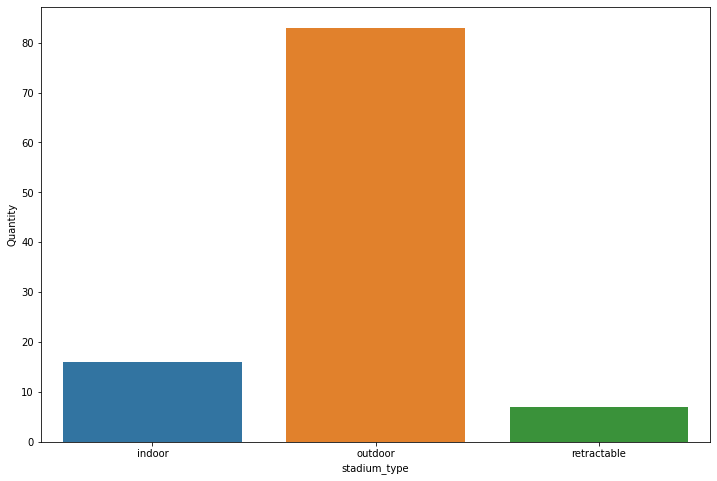

In [32]:
fig_dims = (12,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = plot_kind_stadium.index, y = "Quantity", ax= ax, data = plot_kind_stadium)


### Scores

In [33]:
scores_old

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12942,1/17/2021,2020,Division,True,Kansas City Chiefs,22.0,17.0,Cleveland Browns,KC,-8.0,56,Arrowhead Stadium,False,NaN,NaN,NaN,NaN
12943,1/17/2021,2020,Division,True,New Orleans Saints,20.0,30.0,Tampa Bay Buccaneers,NO,-2.5,53,Mercedes-Benz Superdome,False,NaN,NaN,NaN,NaN
12944,1/24/2021,2020,Conference,True,Green Bay Packers,26.0,31.0,Tampa Bay Buccaneers,GB,-3.0,53,Lambeau Field,False,NaN,NaN,NaN,NaN
12945,1/24/2021,2020,Conference,True,Kansas City Chiefs,38.0,24.0,Buffalo Bills,KC,-3.0,55,Arrowhead Stadium,False,NaN,NaN,NaN,NaN


In [34]:
scores_old["score_balance"] = scores_old["score_home"] - scores_old["score_away"]
scores_old

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,score_balance
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71,NaN,-9.0
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70,NaN,38.0
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82,NaN,20.0
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78,NaN,-5.0
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62,NaN,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12942,1/17/2021,2020,Division,True,Kansas City Chiefs,22.0,17.0,Cleveland Browns,KC,-8.0,56,Arrowhead Stadium,False,NaN,NaN,NaN,NaN,5.0
12943,1/17/2021,2020,Division,True,New Orleans Saints,20.0,30.0,Tampa Bay Buccaneers,NO,-2.5,53,Mercedes-Benz Superdome,False,NaN,NaN,NaN,NaN,-10.0
12944,1/24/2021,2020,Conference,True,Green Bay Packers,26.0,31.0,Tampa Bay Buccaneers,GB,-3.0,53,Lambeau Field,False,NaN,NaN,NaN,NaN,-5.0
12945,1/24/2021,2020,Conference,True,Kansas City Chiefs,38.0,24.0,Buffalo Bills,KC,-3.0,55,Arrowhead Stadium,False,NaN,NaN,NaN,NaN,14.0


In [35]:
scores_old["game_win"] = np.where(scores_old['score_balance'] > 1, 'Y', 'N')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
scores_old_teams = scores_old.loc[:,["team_home","team_away","schedule_week","game_win"]]

In [37]:
scores_old_teams

,team_home,team_away,schedule_week,game_win
0,Miami Dolphins,Oakland Raiders,1,N
1,Houston Oilers,Denver Broncos,1,Y
2,San Diego Chargers,Buffalo Bills,1,Y
3,Miami Dolphins,New York Jets,2,N
4,Green Bay Packers,Baltimore Colts,1,Y
...,...,...,...,...
12942,Kansas City Chiefs,Cleveland Browns,Division,Y
12943,New Orleans Saints,Tampa Bay Buccaneers,Division,N
12944,Green Bay Packers,Tampa Bay Buccaneers,Conference,N
12945,Kansas City Chiefs,Buffalo Bills,Conference,Y


In [38]:
scores_balance = scores_old.copy

#### Checking Stadium that have more victory games from home team

In [39]:
score_stadium_balance = scores_old.copy()
scores_old = scores_old[["stadium", "score_balance"]]

In [40]:
scores_old

,stadium,score_balance
0,Orange Bowl,-9.0
1,Rice Stadium,38.0
2,Balboa Stadium,20.0
3,Orange Bowl,-5.0
4,Lambeau Field,21.0
...,...,...
12942,Arrowhead Stadium,5.0
12943,Mercedes-Benz Superdome,-10.0
12944,Lambeau Field,-5.0
12945,Arrowhead Stadium,14.0


In [41]:
df = scores_old.iloc[:,1]>1
df

0        False
1         True
2         True
3        False
4         True
         ...  
12942     True
12943    False
12944    False
12945     True
12946     True
Name: score_balance, Length: 12947, dtype: bool

In [42]:
df.replace(True, "Y", inplace = True)
df.replace(False, "N", inplace = True)

In [43]:
df

0        N
1        Y
2        Y
3        N
4        Y
        ..
12942    Y
12943    N
12944    N
12945    Y
12946    Y
Name: score_balance, Length: 12947, dtype: object

In [44]:
#.reindex(.index)

new_old_scores = scores_old["stadium"]

In [45]:
new_old_scores = pd.DataFrame(new_old_scores)
new_old_scores

,stadium
0,Orange Bowl
1,Rice Stadium
2,Balboa Stadium
3,Orange Bowl
4,Lambeau Field
...,...
12942,Arrowhead Stadium
12943,Mercedes-Benz Superdome
12944,Lambeau Field
12945,Arrowhead Stadium


In [46]:
victory = pd.concat([new_old_scores, df], axis=1)
victory.rename(columns={"score_balance":"victory"}, inplace = True)
victory

,stadium,victory
0,Orange Bowl,N
1,Rice Stadium,Y
2,Balboa Stadium,Y
3,Orange Bowl,N
4,Lambeau Field,Y
...,...,...
12942,Arrowhead Stadium,Y
12943,Mercedes-Benz Superdome,N
12944,Lambeau Field,N
12945,Arrowhead Stadium,Y


In [47]:
victory_df  = victory.groupby(by = ["stadium","victory"])["victory"].count()
victory_df = pd.DataFrame(victory_df)
victory_df

victory
stadium           victory         
AT&T Stadium      N             14
                  Y             19
Alamo Dome        N              2
                  Y              1
Allegiant Stadium N              6
...                            ...
Wrigley Field     Y             13
Yale Bowl         N             12
                  Y              2
Yankee Stadium    N             27
                  Y             22

[207 rows x 1 columns]

In [48]:
victory_df.rename(columns = {"victory": "balance"}, inplace = True)
victory_df = victory_df.pivot_table("balance",["stadium"], "victory")
victory_df

victory,N,Y
stadium,,
AT&T Stadium,14.0,19.0
Alamo Dome,2.0,1.0
Allegiant Stadium,6.0,2.0
Alltel Stadium,1.0,NaN
Alumni Stadium,5.0,3.0
...,...,...
War Memorial Stadium,35.0,15.0
Wembley Stadium,14.0,8.0
Wrigley Field,22.0,13.0


In [49]:
victory_df.isnull().sum()

victory
N    4
Y    7
dtype: int64

In [50]:
victory_df.fillna(0, inplace = True)
victory_df.isnull().sum()

victory
N    0
Y    0
dtype: int64

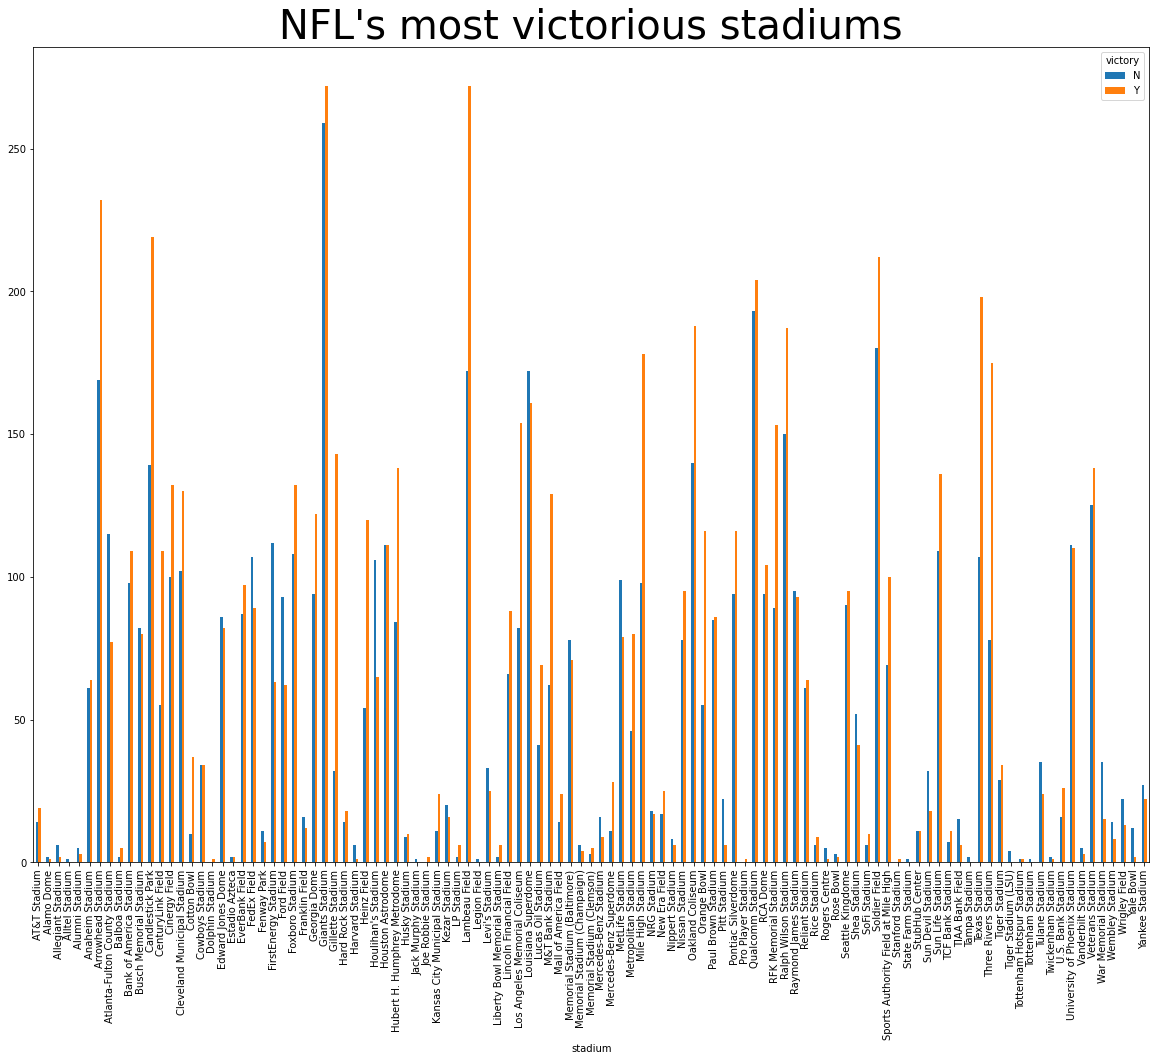

In [51]:
victory_df.plot(kind = "bar", figsize =(20,15))
plt.title("NFL's most victorious stadiums", fontsize=40)
plt.show()

In [52]:
### Top 15 stadiums 
top_15 = victory_df.copy()
top_15["Games"] = top_15["N"] + top_15["Y"]


In [53]:
top_15

victory,N,Y,Games
stadium,,,
AT&T Stadium,14.0,19.0,33.0
Alamo Dome,2.0,1.0,3.0
Allegiant Stadium,6.0,2.0,8.0
Alltel Stadium,1.0,0.0,1.0
Alumni Stadium,5.0,3.0,8.0
...,...,...,...
War Memorial Stadium,35.0,15.0,50.0
Wembley Stadium,14.0,8.0,22.0
Wrigley Field,22.0,13.0,35.0


In [54]:
top_15 = top_15.sort_values(by= "Games", ascending = False).head(15)
top_15 = top_15.iloc[:,:2]



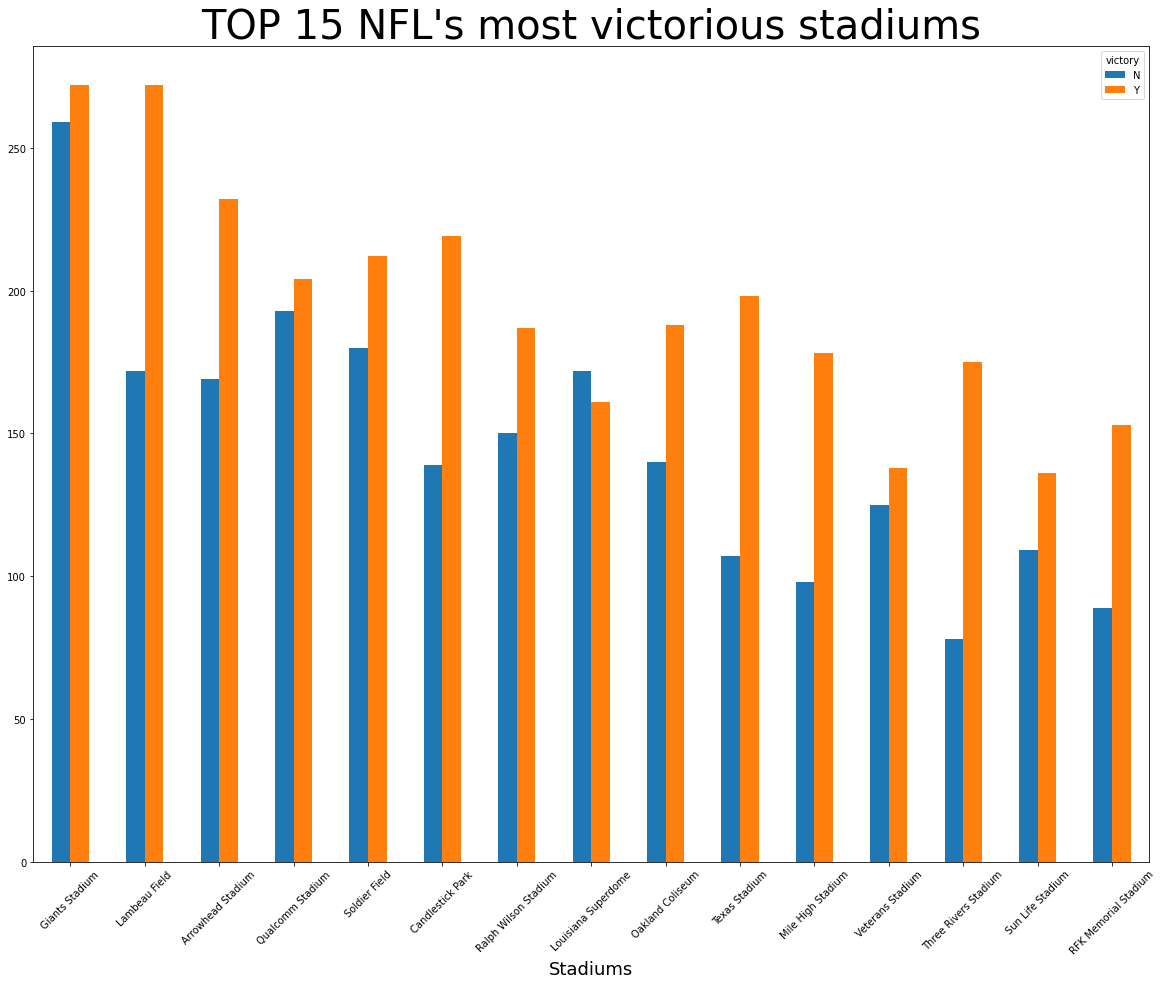

In [55]:
top_15.plot(kind = "bar", figsize =(20,15))
plt.xlabel('Stadiums', fontsize=18)
plt.xticks(rotation=45)
plt.title("TOP 15 NFL's most victorious stadiums", fontsize=40)
plt.show()

In [56]:
top_15["%"] = ((top_15["Y"]) / (top_15["N"] + top_15["Y"])) * 100
top_15 = top_15.iloc[:,-1:].sort_values(by = "%", ascending = False)
top_15

victory,%
stadium,
Three Rivers Stadium,69.169960
Texas Stadium,64.918033
Mile High Stadium,64.492754
RFK Memorial Stadium,63.223140
Lambeau Field,61.261261
Candlestick Park,61.173184
Arrowhead Stadium,57.855362
Oakland Coliseum,57.317073
Sun Life Stadium,55.510204


(49.0, 70.0)

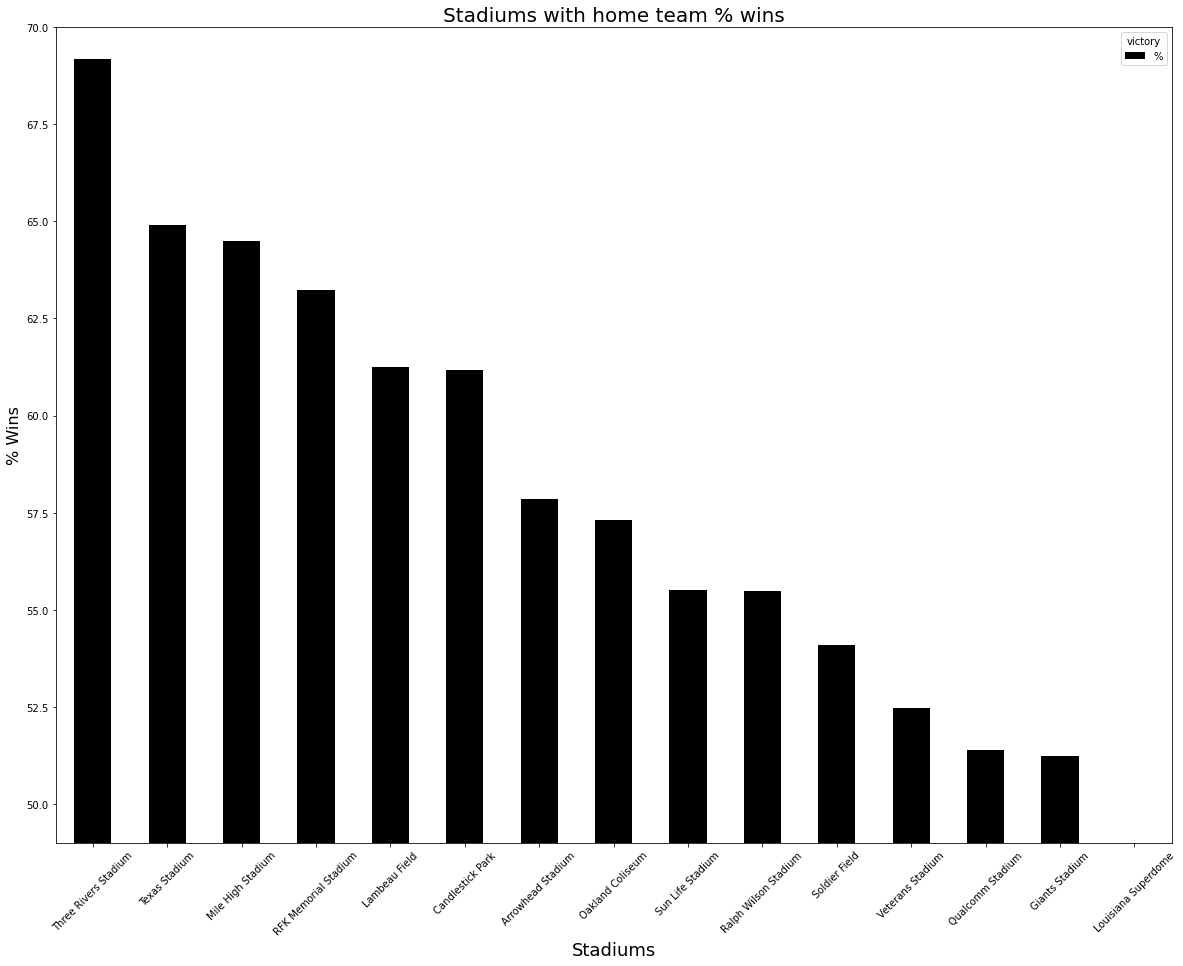

In [57]:
top_15.plot(kind = "bar", figsize =(20,15), color="black")
plt.title("Stadiums with home team % wins", fontsize = 20)
plt.xlabel('Stadiums', fontsize=18)
plt.xticks(rotation=45)
plt.ylabel('% Wins', fontsize=16)
plt.ylim(49,70)

#### Three Rivers Stadium is the Stadium that have more home team victory per game

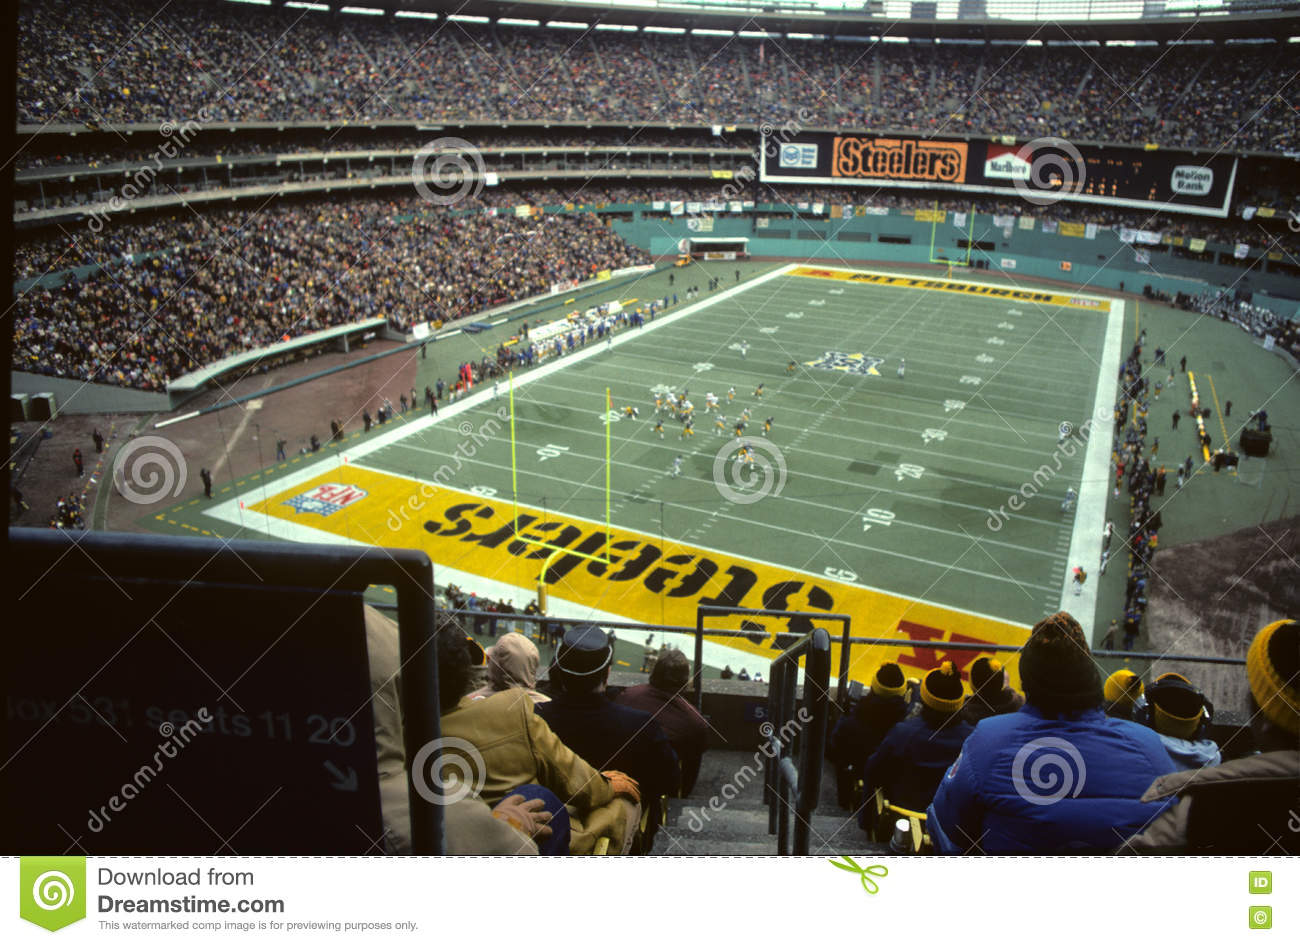

In [58]:
Image(filename='Three Rivers Stadium.jpg') 

## Teams

In [59]:
teams_acron = teams.loc[:,["team_name","team_id"]]
teams_acron

,team_name,team_id
0,Arizona Cardinals,ARI
1,Phoenix Cardinals,ARI
2,St. Louis Cardinals,ARI
3,Atlanta Falcons,ATL
4,Baltimore Ravens,BAL
5,Buffalo Bills,BUF
6,Carolina Panthers,CAR
7,Chicago Bears,CHI
8,Cincinnati Bengals,CIN
9,Cleveland Browns,CLE


In [60]:
scores_old_teams["team_acr_home"] = scores_old_teams["team_home"]
scores_old_teams["team_acr_away"] = scores_old_teams["team_away"]
scores_old_teams

,team_home,team_away,schedule_week,game_win,team_acr_home,team_acr_away
0,Miami Dolphins,Oakland Raiders,1,N,Miami Dolphins,Oakland Raiders
1,Houston Oilers,Denver Broncos,1,Y,Houston Oilers,Denver Broncos
2,San Diego Chargers,Buffalo Bills,1,Y,San Diego Chargers,Buffalo Bills
3,Miami Dolphins,New York Jets,2,N,Miami Dolphins,New York Jets
4,Green Bay Packers,Baltimore Colts,1,Y,Green Bay Packers,Baltimore Colts
...,...,...,...,...,...,...
12942,Kansas City Chiefs,Cleveland Browns,Division,Y,Kansas City Chiefs,Cleveland Browns
12943,New Orleans Saints,Tampa Bay Buccaneers,Division,N,New Orleans Saints,Tampa Bay Buccaneers
12944,Green Bay Packers,Tampa Bay Buccaneers,Conference,N,Green Bay Packers,Tampa Bay Buccaneers
12945,Kansas City Chiefs,Buffalo Bills,Conference,Y,Kansas City Chiefs,Buffalo Bills


In [61]:
rename = {'Arizona Cardinals':'ARI',
'Phoenix Cardinals':'ARI',
'St. Louis Cardinals':'ARI',
'Atlanta Falcons':'ATL',
'Baltimore Ravens':'BAL',
'Buffalo Bills':'BUF',
'Carolina Panthers':'CAR',
'Chicago Bears':'CHI',
'Cincinnati Bengals':'CIN',
'Cleveland Browns':'CLE',
'Dallas Cowboys':'DAL',
'Denver Broncos':'DEN',
'Detroit Lions':'DET',
'Green Bay Packers':'GB',
'Houston Texans':'HOU',
'Baltimore Colts':'IND',
'Indianapolis Colts':'IND',
'Jacksonville Jaguars':'JAX',
'Kansas City Chiefs':'KC',
'Los Angeles Chargers':'LAC',
'San Diego Chargers':'LAC',
'Los Angeles Rams':'LAR',
'St. Louis Rams':'LAR',
'Miami Dolphins':'MIA',
'Minnesota Vikings':'MIN',
'New England Patriots':'NE',
'Boston Patriots':'NE',
'New Orleans Saints':'NO',
'New York Giants':'NYG',
'New York Jets':'NYJ',
'Los Angeles Raiders':'LVR',
'Las Vegas Raiders':'LVR',
'Oakland Raiders':'LVR',
'Philadelphia Eagles':'PHI',
'Pittsburgh Steelers':'PIT',
'Seattle Seahawks':'SEA',
'San Francisco 49ers':'SF',
'Tampa Bay Buccaneers':'TB',
'Houston Oilers':'TEN',
'Tennessee Oilers':'TEN',
'Tennessee Titans':'TEN',
'Washington Redskins':'WAS',
'Washington Football Team':'WAS'}



### Checking the most winner and losers team

In [62]:
scores_old_teams.team_acr_home = scores_old_teams.team_acr_home.map(rename)
scores_old_teams.team_acr_away = scores_old_teams.team_acr_away.map(rename)

In [63]:
scores_old_teams

,team_home,team_away,schedule_week,game_win,team_acr_home,team_acr_away
0,Miami Dolphins,Oakland Raiders,1,N,MIA,LVR
1,Houston Oilers,Denver Broncos,1,Y,TEN,DEN
2,San Diego Chargers,Buffalo Bills,1,Y,LAC,BUF
3,Miami Dolphins,New York Jets,2,N,MIA,NYJ
4,Green Bay Packers,Baltimore Colts,1,Y,GB,IND
...,...,...,...,...,...,...
12942,Kansas City Chiefs,Cleveland Browns,Division,Y,KC,CLE
12943,New Orleans Saints,Tampa Bay Buccaneers,Division,N,NO,TB
12944,Green Bay Packers,Tampa Bay Buccaneers,Conference,N,GB,TB
12945,Kansas City Chiefs,Buffalo Bills,Conference,Y,KC,BUF


In [64]:
scores_old_teams.isna().sum()

team_home        0
team_away        0
schedule_week    0
game_win         0
team_acr_home    0
team_acr_away    0
dtype: int64

In [65]:
scores_old_teams

,team_home,team_away,schedule_week,game_win,team_acr_home,team_acr_away
0,Miami Dolphins,Oakland Raiders,1,N,MIA,LVR
1,Houston Oilers,Denver Broncos,1,Y,TEN,DEN
2,San Diego Chargers,Buffalo Bills,1,Y,LAC,BUF
3,Miami Dolphins,New York Jets,2,N,MIA,NYJ
4,Green Bay Packers,Baltimore Colts,1,Y,GB,IND
...,...,...,...,...,...,...
12942,Kansas City Chiefs,Cleveland Browns,Division,Y,KC,CLE
12943,New Orleans Saints,Tampa Bay Buccaneers,Division,N,NO,TB
12944,Green Bay Packers,Tampa Bay Buccaneers,Conference,N,GB,TB
12945,Kansas City Chiefs,Buffalo Bills,Conference,Y,KC,BUF


In [66]:
scores_old_teams["game_wins"] = np.where(scores_old_teams['game_win'] == "Y",1,0 )
scores_old_teams["game_not_win"] = np.where(scores_old_teams['game_win'] == "N",1,0 )

scores_old_teams

,team_home,team_away,schedule_week,game_win,team_acr_home,team_acr_away,game_wins,game_not_win
0,Miami Dolphins,Oakland Raiders,1,N,MIA,LVR,0,1
1,Houston Oilers,Denver Broncos,1,Y,TEN,DEN,1,0
2,San Diego Chargers,Buffalo Bills,1,Y,LAC,BUF,1,0
3,Miami Dolphins,New York Jets,2,N,MIA,NYJ,0,1
4,Green Bay Packers,Baltimore Colts,1,Y,GB,IND,1,0
...,...,...,...,...,...,...,...,...
12942,Kansas City Chiefs,Cleveland Browns,Division,Y,KC,CLE,1,0
12943,New Orleans Saints,Tampa Bay Buccaneers,Division,N,NO,TB,0,1
12944,Green Bay Packers,Tampa Bay Buccaneers,Conference,N,GB,TB,0,1
12945,Kansas City Chiefs,Buffalo Bills,Conference,Y,KC,BUF,1,0


In [67]:
scores_teams_wins = scores_old_teams.pivot_table("game_wins",["team_acr_home"],aggfunc=np.sum)
scores_teams_wins

,game_wins
team_acr_home,
ARI,204
ATL,206
BAL,137
BUF,229
CAR,114
CHI,230
CIN,224
CLE,193
DAL,292


In [68]:
# Testing winners data 
miami_test = scores_old_teams[scores_old_teams['team_acr_home']=="MIA"]
miami_test.game_wins.sum()

269

In [69]:
scores_teams_loses = scores_old_teams.pivot_table("game_not_win",["team_acr_home"],aggfunc=np.sum)
scores_teams_loses

,game_not_win
team_acr_home,
ARI,223
ATL,225
BAL,71
BUF,208
CAR,101
CHI,208
CIN,194
CLE,215
DAL,167


In [70]:
# Testing loses data 
miami_test = scores_old_teams[scores_old_teams['team_acr_home']=="MIA"]
miami_test.game_not_win.sum()

178

In [71]:
teams_home_balance = pd.merge(scores_teams_wins, scores_teams_loses, on = "team_acr_home")
teams_home_balance

,game_wins,game_not_win
team_acr_home,,
ARI,204,223
ATL,206,225
BAL,137,71
BUF,229,208
CAR,114,101
CHI,230,208
CIN,224,194
CLE,193,215
DAL,292,167


In [72]:
teams_home_balance["%_of_wins"] = (teams_home_balance["game_wins"]/(teams_home_balance["game_wins"] + teams_home_balance["game_not_win"]))*100
teams_home_balance

,game_wins,game_not_win,%_of_wins
team_acr_home,,,
ARI,204,223,47.775176
ATL,206,225,47.795824
BAL,137,71,65.865385
BUF,229,208,52.402746
CAR,114,101,53.023256
CHI,230,208,52.511416
CIN,224,194,53.588517
CLE,193,215,47.303922
DAL,292,167,63.616558


In [73]:
teams_home_balance.sort_values(by="%_of_wins", ascending = False, inplace = True)

In [74]:
teams_home_balance.head(10)

,game_wins,game_not_win,%_of_wins
team_acr_home,,,
PIT,302,154,66.228070
BAL,137,71,65.865385
DAL,292,167,63.616558
NE,289,166,63.516484
DEN,280,169,62.360802
MIN,279,169,62.276786
GB,276,173,61.469933
MIA,269,178,60.178971
KC,259,180,58.997722


In [75]:
best_10_teams_home = teams_home_balance.head(10)
best_10_teams_home

,game_wins,game_not_win,%_of_wins
team_acr_home,,,
PIT,302,154,66.228070
BAL,137,71,65.865385
DAL,292,167,63.616558
NE,289,166,63.516484
DEN,280,169,62.360802
MIN,279,169,62.276786
GB,276,173,61.469933
MIA,269,178,60.178971
KC,259,180,58.997722


In [76]:
teams_home_balance.tail(10).sort_values(by = "%_of_wins", ascending = True)

,game_wins,game_not_win,%_of_wins
team_acr_home,,,
TB,157,203,43.611111
NYJ,196,232,45.794393
CLE,193,215,47.303922
ARI,204,223,47.775176
ATL,206,225,47.795824
NO,208,221,48.484848
DET,209,215,49.292453
JAX,106,106,50.000000
HOU,79,79,50.000000


In [77]:
worst_10_teams_home = teams_home_balance.tail(10).sort_values(by = "%_of_wins", ascending = True)
worst_10_teams_home

,game_wins,game_not_win,%_of_wins
team_acr_home,,,
TB,157,203,43.611111
NYJ,196,232,45.794393
CLE,193,215,47.303922
ARI,204,223,47.775176
ATL,206,225,47.795824
NO,208,221,48.484848
DET,209,215,49.292453
JAX,106,106,50.000000
HOU,79,79,50.000000


In [78]:
## Aways teams
away_scores_teams_wins = scores_old_teams.pivot_table("game_not_win",["team_acr_away"],aggfunc=np.sum)
away_scores_teams_wins.rename(columns = {"game_not_win": "winner_games"}, inplace = True)

In [79]:
away_scores_teams_wins

,winner_games
team_acr_away,
ARI,161
ATL,175
BAL,103
BUF,175
CAR,106
CHI,185
CIN,154
CLE,155
DAL,243


In [80]:
away_scores_teams_not_wins = scores_old_teams.pivot_table("game_wins",["team_acr_away"],aggfunc=np.sum)
away_scores_teams_not_wins
away_scores_teams_not_wins.rename(columns = {"game_wins": "lose_games"}, inplace = True)

In [81]:
teams_away_balance = pd.merge(away_scores_teams_wins, away_scores_teams_not_wins, on = "team_acr_away")
teams_away_balance

,winner_games,lose_games
team_acr_away,,
ARI,161,271
ATL,175,263
BAL,103,116
BUF,175,264
CAR,106,112
CHI,185,247
CIN,154,264
CLE,155,256
DAL,243,206


In [82]:
teams_away_balance["%_of_wins"] = (teams_away_balance["winner_games"]/(teams_away_balance["winner_games"] + teams_away_balance["lose_games"]))*100
teams_away_balance

,winner_games,lose_games,%_of_wins
team_acr_away,,,
ARI,161,271,37.268519
ATL,175,263,39.954338
BAL,103,116,47.031963
BUF,175,264,39.863326
CAR,106,112,48.623853
CHI,185,247,42.824074
CIN,154,264,36.842105
CLE,155,256,37.712895
DAL,243,206,54.120267


In [83]:
teams_away_balance.sort_values(by="%_of_wins", ascending = False, inplace = True)
teams_away_balance

,winner_games,lose_games,%_of_wins
team_acr_away,,,
DAL,243,206,54.120267
NE,228,218,51.121076
PIT,230,220,51.111111
SF,223,215,50.913242
LVR,222,219,50.340136
KC,219,221,49.772727
PHI,218,222,49.545455
LAR,219,226,49.213483
MIN,220,228,49.107143


In [84]:
worst_10_teams_away = teams_away_balance.tail(10).sort_values(by = "%_of_wins", ascending = True)

In [85]:
best_10_teams_away = teams_away_balance.head(10)
best_10_teams_away

,winner_games,lose_games,%_of_wins
team_acr_away,,,
DAL,243,206,54.120267
NE,228,218,51.121076
PIT,230,220,51.111111
SF,223,215,50.913242
LVR,222,219,50.340136
KC,219,221,49.772727
PHI,218,222,49.545455
LAR,219,226,49.213483
MIN,220,228,49.107143


In [86]:
worst_10_teams_away

,winner_games,lose_games,%_of_wins
team_acr_away,,,
DET,147,287,33.870968
TB,124,240,34.065934
JAX,80,138,36.697248
CIN,154,264,36.842105
ARI,161,271,37.268519
CLE,155,256,37.712895
HOU,59,97,37.820513
BUF,175,264,39.863326
ATL,175,263,39.954338


In [87]:
best_10_teams_away

,winner_games,lose_games,%_of_wins
team_acr_away,,,
DAL,243,206,54.120267
NE,228,218,51.121076
PIT,230,220,51.111111
SF,223,215,50.913242
LVR,222,219,50.340136
KC,219,221,49.772727
PHI,218,222,49.545455
LAR,219,226,49.213483
MIN,220,228,49.107143


### Best team playing at home

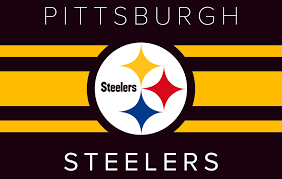

In [88]:
Image(filename='Steelers.png') 

### Best team playing away

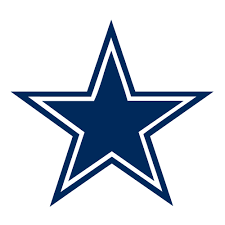

In [89]:
Image(filename='Dallas.png') 

### Worst team playing at home

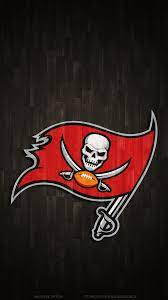

In [90]:
Image(filename ='Tampa.jpg') 

# Playoffs Information

In [91]:
scores_old_teams['schedule_week'].unique()


array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', 'Conference', 'Superbowl', '17',
       'Division', 'Wildcard', '18', 'WildCard', 'SuperBowl'],
      dtype=object)

In [92]:
scores_teams_playoffs = scores_old_teams.loc[(scores_old_teams['schedule_week'] == "Conference") 
                    | (scores_old_teams['schedule_week'] == "Superbowl")
                    | (scores_old_teams['schedule_week'] == "Division")
                    | (scores_old_teams['schedule_week'] == "Wildcard")
                    | (scores_old_teams['schedule_week'] == "WildCard")
                    | (scores_old_teams['schedule_week'] == "SuperBowl")]


In [93]:
scores_teams_playoffs

,team_home,team_away,schedule_week,game_win,team_acr_home,team_acr_away,game_wins,game_not_win
168,Buffalo Bills,Kansas City Chiefs,Conference,N,BUF,KC,0,1
169,Dallas Cowboys,Green Bay Packers,Conference,N,DAL,GB,0,1
170,Green Bay Packers,Kansas City Chiefs,Superbowl,Y,GB,KC,1,0
348,Green Bay Packers,Dallas Cowboys,Conference,Y,GB,DAL,1,0
349,Oakland Raiders,Houston Oilers,Conference,Y,LVR,TEN,1,0
...,...,...,...,...,...,...,...,...
12942,Kansas City Chiefs,Cleveland Browns,Division,Y,KC,CLE,1,0
12943,New Orleans Saints,Tampa Bay Buccaneers,Division,N,NO,TB,0,1
12944,Green Bay Packers,Tampa Bay Buccaneers,Conference,N,GB,TB,0,1
12945,Kansas City Chiefs,Buffalo Bills,Conference,Y,KC,BUF,1,0


In [94]:
teams_playoffs = scores_teams_playoffs["team_acr_home"].append(scores_teams_playoffs["team_acr_away"])
teams_playoffs = pd.DataFrame(teams_playoffs)
teams_playoffs.rename(columns = {0 : "Teams"}, inplace =  True)
teams_playoffs["games"] = 1
teams_playoffs

,Teams,games
168,BUF,1
169,DAL,1
170,GB,1
348,GB,1
349,LVR,1
...,...,...
12942,CLE,1
12943,TB,1
12944,TB,1
12945,BUF,1


In [95]:
teams_playoffs = teams_playoffs.groupby(by = "Teams").sum()
teams_playoffs

,games
Teams,
ARI,14
ATL,24
BAL,27
BUF,31
CAR,17
CHI,25
CIN,19
CLE,20
DAL,61


In [96]:
teams_playoffs_top10 = teams_playoffs.sort_values(by = "games", ascending = False).head(10)
teams_playoffs_top10

,games
Teams,
PIT,61
DAL,61
NE,56
SF,52
MIN,51
GB,49
LVR,44
IND,44
DEN,42


### TOP Teams with most games in playoffs

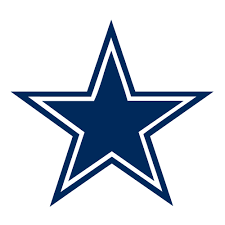

In [97]:
Image(filename ='Dallas.png') 

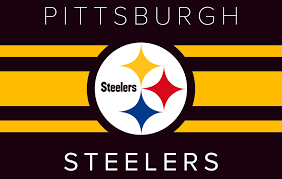

In [98]:
Image(filename ='Steelers.png')

In [99]:
scores_teams_playoffs

,team_home,team_away,schedule_week,game_win,team_acr_home,team_acr_away,game_wins,game_not_win
168,Buffalo Bills,Kansas City Chiefs,Conference,N,BUF,KC,0,1
169,Dallas Cowboys,Green Bay Packers,Conference,N,DAL,GB,0,1
170,Green Bay Packers,Kansas City Chiefs,Superbowl,Y,GB,KC,1,0
348,Green Bay Packers,Dallas Cowboys,Conference,Y,GB,DAL,1,0
349,Oakland Raiders,Houston Oilers,Conference,Y,LVR,TEN,1,0
...,...,...,...,...,...,...,...,...
12942,Kansas City Chiefs,Cleveland Browns,Division,Y,KC,CLE,1,0
12943,New Orleans Saints,Tampa Bay Buccaneers,Division,N,NO,TB,0,1
12944,Green Bay Packers,Tampa Bay Buccaneers,Conference,N,GB,TB,0,1
12945,Kansas City Chiefs,Buffalo Bills,Conference,Y,KC,BUF,1,0


In [100]:
scores_teams_playoffs["team_won"] = np.where(scores_teams_playoffs['game_wins'] == 1,scores_teams_playoffs["team_acr_home"],scores_teams_playoffs["team_acr_away"])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [101]:
scores_teams_playoffs["games"] = 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [102]:
team_winner_playoff = scores_teams_playoffs.groupby(by ="team_won")["games"].sum()
team_winner_playoff
team_winner_playoff = pd.DataFrame(team_winner_playoff)
team_winner_playoff.sort_values(by = "games", ascending = False )

,games
team_won,
NE,37
PIT,36
DAL,36
SF,29
GB,28
LVR,25
DEN,22
WAS,21
NYG,21


## Team that have more victories in playoff games

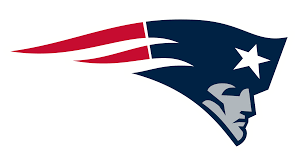

In [103]:
Image(filename ='Patriots.png') 

### Checking Superbowl

In [104]:
teams_superbowl = scores_teams_playoffs.loc[(scores_teams_playoffs['schedule_week'] == "Superbowl")
                                      | (scores_teams_playoffs['schedule_week'] == "SuperBowl")]
teams_superbowl

,team_home,team_away,schedule_week,game_win,team_acr_home,team_acr_away,game_wins,game_not_win,team_won,games
170,Green Bay Packers,Kansas City Chiefs,Superbowl,Y,GB,KC,1,0,GB,1
350,Green Bay Packers,Oakland Raiders,Superbowl,Y,GB,LVR,1,0,GB,1
538,Baltimore Colts,New York Jets,Superbowl,N,IND,NYJ,0,1,NYJ,1
727,Kansas City Chiefs,Minnesota Vikings,Superbowl,Y,KC,MIN,1,0,KC,1
916,Baltimore Colts,Dallas Cowboys,Superbowl,Y,IND,DAL,1,0,IND,1
1105,Dallas Cowboys,Miami Dolphins,Superbowl,Y,DAL,MIA,1,0,DAL,1
1294,Miami Dolphins,Washington Redskins,Superbowl,Y,MIA,WAS,1,0,MIA,1
1483,Miami Dolphins,Minnesota Vikings,Superbowl,Y,MIA,MIN,1,0,MIA,1
1672,Minnesota Vikings,Pittsburgh Steelers,Superbowl,N,MIN,PIT,0,1,PIT,1
1861,Dallas Cowboys,Pittsburgh Steelers,Superbowl,N,DAL,PIT,0,1,PIT,1


In [105]:
all_teams_superbowl = teams_superbowl["team_acr_home"].append(teams_superbowl["team_acr_away"])
all_teams_superbowl = pd.DataFrame(all_teams_superbowl)
all_teams_superbowl.rename(columns = {0 : "Teams"}, inplace =  True)
all_teams_superbowl["games"] = 1
all_teams_superbowl

,Teams,games
170,GB,1
350,GB,1
538,IND,1
727,KC,1
916,IND,1
...,...,...
11876,ATL,1
12143,PHI,1
12410,NE,1
12677,SF,1


In [106]:
all_teams_superbowl = all_teams_superbowl.groupby(by = "Teams").sum()
all_teams_superbowl.sort_values(by= "games", ascending = False).head(4)

,games
Teams,
NE,11
PIT,8
DAL,8
DEN,8


## Top Teams that have more Superbowl games

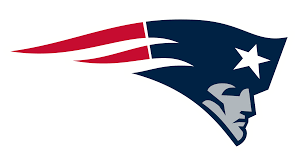

In [107]:
Image(filename ='Patriots.png')

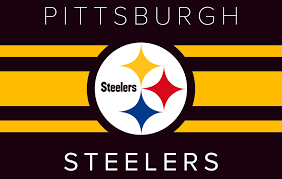

In [108]:
Image(filename ='Steelers.png')

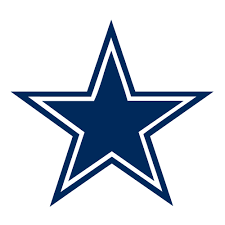

In [109]:
Image(filename ='Dallas.png')

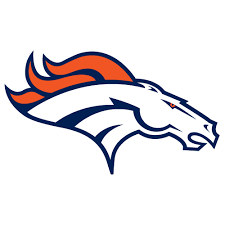

In [110]:
Image(filename ='Denver Broncos.png')

In [111]:
teams_superbowl_winners = teams_superbowl.groupby(by ="team_won")["games"].sum()
teams_superbowl_winners
teams_superbowl_winners = pd.DataFrame(teams_superbowl_winners)
teams_superbowl_winners

,games
team_won,
BAL,2
CHI,1
DAL,5
DEN,3
GB,4
IND,2
KC,2
LAR,1
LVR,3


In [112]:
superbowl_winners = teams_superbowl_winners.sort_values(by = "games", ascending = False)
superbowl_winners.rename(columns={"games":"Super Bowl championships"})


,Super Bowl championships
team_won,
NE,6
PIT,6
DAL,5
SF,5
GB,4
NYG,4
LVR,3
WAS,3
DEN,3


## Teams that have more superbowl championship

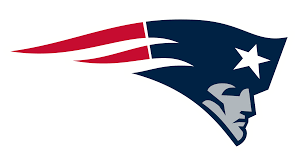

In [113]:
Image(filename ='Patriots.png') 

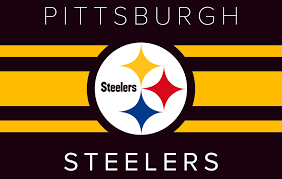

In [114]:
Image(filename ='Steelers.png')